In [39]:
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools
import math
import time  
from IPython.display import display, clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

class Moss_Agent():

    def __init__(self,xmax=99,ymax=99,sex="M",shape="o"):
        self.x = random.randint(0, xmax)
        self.y = random.randint(0, ymax)
        self.age = 0 
        self.age_limit = 5
        self.xmax = xmax
        self.ymax = ymax
        self.last_litter_time = 1
        self.shape = shape
    
    def aging(self):
        self.age += 1

    def check_if_dead(self):
        if self.age > self.age_limit:
            return True
        else:
            return False

    def replicate(self, environ):
        # Find all adjacent cells
        adjacent_cells = [(self.x-1, self.y), (self.x+1, self.y), (self.x, self.y-1), (self.x, self.y+1)]
        
        # Shuffle the list of adjacent cells randomly
        random.shuffle(adjacent_cells)

        # Iterate over shuffled list of adjacent cells
        for cell in adjacent_cells:
            x, y = cell

            # Check if cell is within bounds of environment
            if x >= 0 and x < self.xmax and y >= 0 and y < self.ymax:
                # Check if cell is empty
                if environ[x][y] == 1:
                    # Create new agent and add it to the environment and agent list
                    new_agent = Moss_Agent(self.xmax, self.ymax)
                    new_agent.x = x
                    new_agent.y = y
                    environ[x][y] = 0
                    self.last_litter_time = 0
#                    self.age -= 2  # Reduce the age of the parent agent by 2 after replicating
                    return new_agent
        return None
    


class Environment():

    def __init__(self, tree_radius=10, n_trees=0, xsize=100, ysize=100):
        self.xsize = xsize
        self.ysize = ysize
        self.environ = np.ones((self.xsize,self.ysize))
        self.agent_list = []
        self.n_trees = n_trees
        self.tree_radius = tree_radius
        self.place_trees()
    
    def place_trees(self):
        if self.n_trees>0:
            for i in range(self.n_trees):
                print(i)
                x_cord = random.randint(0,self.xsize-1)
                y_cord = random.randint(0,self.ysize-1)
                self.environ[x_cord][y_cord]=2
                for i in range(self.xsize):
                    for j in range(self.ysize):
                        radius = self.tree_radius
                        distance = np.sqrt((i - radius)**2 + (j - radius)**2)
                        if distance <= radius:
                            self.environ[i][j]=2
        else:
            pass

    def add_agent(self,agent):
        self.agent_list.append(agent)
        self.environ[agent.x, agent.y] = 0
        
    def simulate(self,tot_time):
        for dt in range(tot_time):
            clear_output(wait=True)
            plt.figure(figsize=(6, 6)) 
            plt.imshow(self.environ) 
            ax = plt.gca()  
            for agent in self.agent_list:
                agent.aging()
                agent.last_litter_time +=1
                if agent.check_if_dead():
                    self.environ[agent.x, agent.y] = 1
                    self.agent_list.remove(agent)
                elif agent.last_litter_time >= 3:
                    new_agent = agent.replicate(self.environ)
                    if new_agent:
                        self.add_agent(new_agent)
            plt.xlim(0,self.xsize)
            plt.ylim(0,self.ysize)
            plt.show()   
            time.sleep(0.1)


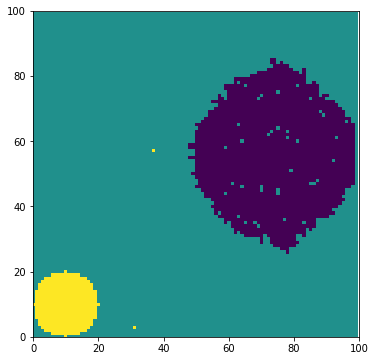

In [41]:
env = Environment(n_trees=2)
moss1 = Moss_Agent()
env.add_agent(moss1)
env.simulate(50)